## <b> The 2017 Earthquake Swarm off the Coast of Valparaiso, Chile <b/>

    Author: Jelis J. Sostre Cortes
    
<img src = https://static.temblor.net/wp-content/uploads/2017/04/22-Apr-2017-M5.9-Valparaiso-quake-4.jpg>

This seismic sequence started on April, 2017 and was followed by more than 1,000 aftershocks. These events have been linked to other seismic swarms that have happened in the past, like in 2010 (which is believed to have brought the Valparaiso region of the plate closer to failure) and 2015 as shown in the picture above. The objective of this Jupyter Notebook is to address and analyze these seismic sequences.

<b>Imports:</b>

In [80]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy import UTCDateTime
from obspy import read_events
from obspy.clients.fdsn import Client
client = Client("IRIS")

<b> Mainshock Seismogram</b>

This first section of code will create a seismogram of the mainshock of magnitude 6.9 by extracting the seismic trace from a downloaded stream object and then plotting it

In [133]:
network = "C"
station = "GO05"
location = "--"
channel = "BHZ"
client = Client("IRIS")
startt = UTCDateTime("2017-04-24T21:38:50")
endt = UTCDateTime("2017-04-24T21:41:00")
st = client.get_waveforms(network, station, location, channel, startt, endt)

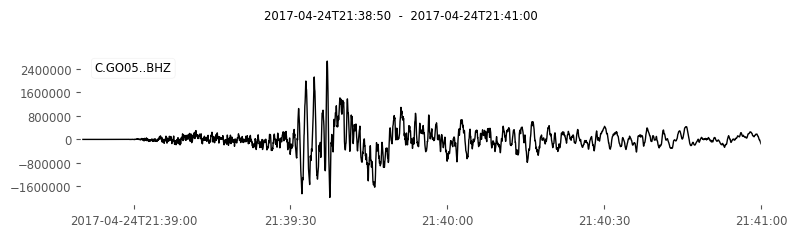

In [134]:
tr = st[0]
fig = tr.plot()

<b>Mainshock Spectrogram</b>

The following set of code will create a spectrogram of the mainshock

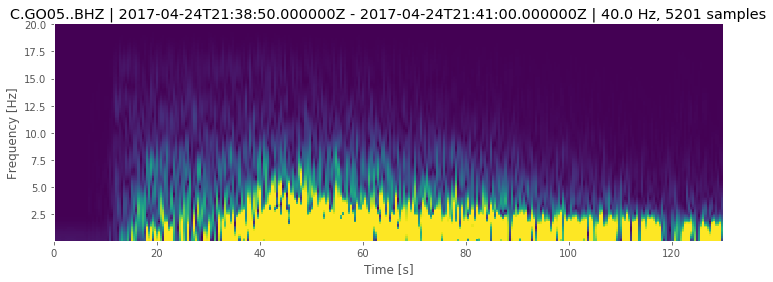

In [159]:
plt.rcParams['figure.figsize'] = (12, 4)
fig = tr.spectrogram(show=False, per_lap=.5, wlen=1)
ax = fig.axes[0]
im = ax.images[0]
im.set_clim(vmax=60000)

The spectrogram displays the frequency content as it changes with time. Here, we can observe the amount of energy that was released by the earthquake by analyzing the frequency content shown on the spectrogram. In this case, the energy begins abruptly in time and there is sustained energy that is strongest at lower frequencies and glides from lower to higher frequencies over time.

<b>Setting the search parameters in IRIS event URL builder:</b>

This set of code describes the set parameters used and then stored in the chile object

In [2]:
startt = UTCDateTime("2017-03-01")
endt = UTCDateTime("2020-05-31")
maxrad = 4.0
lat = -33.038
lon = -72.062
minmag = 3.0

In [67]:
chile = read_events("http://service.iris.edu/fdsnws/event/1/query?starttime=2017-03-01T00:00:00&endtime=2017-05-31T00:00:00&minmag=3.0&orderby=time&format=xml&lat=-33.038&lon=-72.062&maxradius=4.000&nodata=404")

In [7]:
print(chile)

162 Event(s) in Catalog:
2017-05-30T22:57:07.140000Z | -31.544,  -69.291 | 4.6 mb
2017-05-30T21:29:06.140000Z | -30.684,  -71.648 | 4.3 mb
...
2017-03-06T13:35:16.000000Z | -31.238,  -68.376 | 4.1 ML
2017-03-05T01:52:06.360000Z | -30.354,  -71.695 | 3.7 mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'


<b> Local Projection </b>

The following code will create a graph that displays a zoomed in projection of the events in the catalog object. These events correspond to the seismic sequence, including one month before and one month after the mainshock of magnitude 6.9

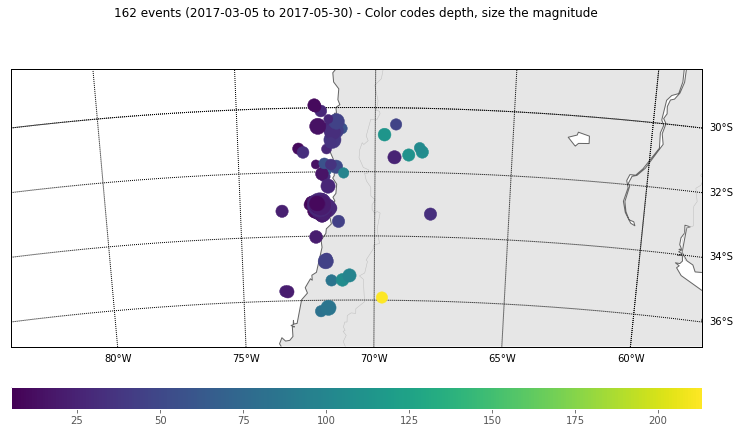

In [75]:
chile.plot(projection="local")
plt.show()

<b> Magnitude Over Time Graph</b>

The following code will create two list objects called <b>times</b> and <b>mags</b>. Then it will perform a loop to go through each event in the chile object and store the respective values of time and magnitude in each corresponding list.

In [78]:
times = []
mags = []
for event in chile:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)
mtimes = mdates.date2num(times)
print(times[97], mags[97])

2017-04-24 21:38:30.840000 6.9


This following section of code will create the Magnitude Over Time graph:

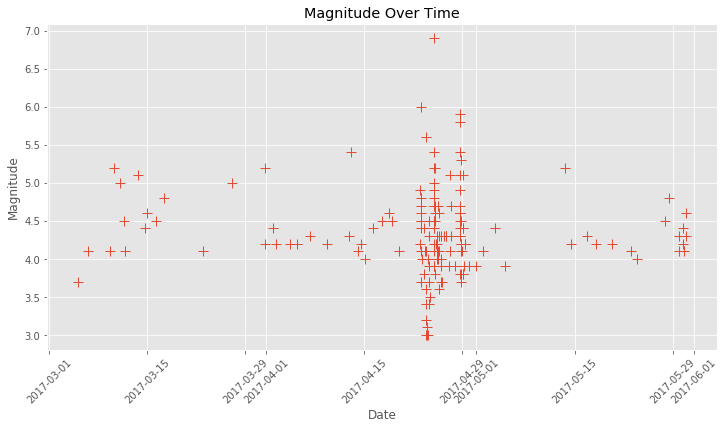

In [76]:
fig1=plt.subplots(1,1)
plt.plot_date(mtimes, mags, marker='+', markersize=10)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 6
plt.title('Magnitude Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Magnitude')
plt.show()

In this magnitude vs date graph, we can observe how the earthquakes rapidly increased in the month of April and then decreased again. There are also multiple foreshocks and aftershocks visible in the previous and following months of the mainshock.

<b> Seismicity rate in the 10 years prior to the event</b>

The following set of code will be focused on the change in seismicity rate over time in the central region of Chile. 

First, we must request the necessary data:

In [49]:
chile2 = read_events("http://service.iris.edu/fdsnws/event/1/query?starttime=2007-04-01T00:00:00&endtime=2017-04-30T00:00:00&minmag=3.0&orderby=time&format=xml&lat=-33.038&lon=-72.062&maxradius=5.000&nodata=404")

Next, we are once again setting a loop that will take the time and magnitude values, this time from the chile2 object, and storing them in separate lists:

In [50]:
times = []
mags = []
for event in chile2:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)
mtimes = mdates.date2num(times)
print(chile2)

21387 Event(s) in Catalog:
2017-04-29T22:15:56.970000Z | -31.289,  -71.771 | 3.9 Mwr
2017-04-29T08:54:00.480000Z | -33.200,  -72.143 | 4.2 Mwr
...
2007-04-01T21:02:19.200000Z | -31.637,  -71.917 | 3.9 ML
2007-04-01T16:50:35.530000Z | -31.580,  -71.901 | 4.3 mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'


The next section of code will create a Seismicity Rate Over Time graph:

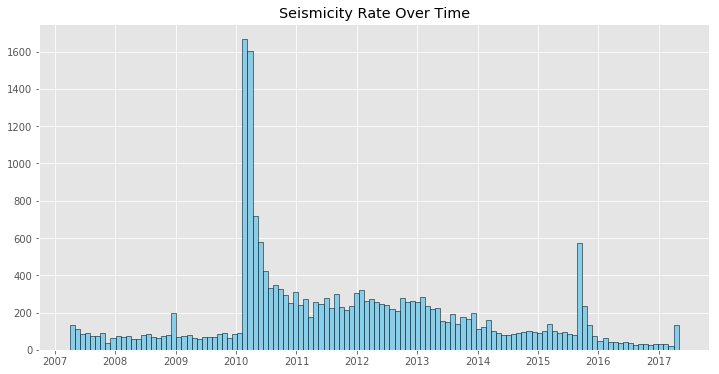

In [63]:
fig2, axes = plt.subplots(1,1)
axes.hist(mtimes, bins=120, color="skyblue", ec="black")
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.title('Seismicity Rate Over Time')
plt.show()

After reviewing the resulting plot, it is evident how the seismicity rate in this specific region (central Chile) has been incredibly active, specially in 2010 where a devastating magnitude 8.8 earthquake occurred followed by a tsunami. Another significant peak is also visible at the end of the year of 2015, where another destructive magnitude 8.3 earthquake occured, which also triggered a tsunami. 

<b> Final Thoughts and Conclusions:</b>

After analyzing the given seismic data and resulting graphs, it is evident that central Chile is one of the most seismically active regions in the world. As such, the largest earthquake ever recorded (of magnitude 9.5) occured along the Chile Trench in 1960, near the location of the Valparaiso swarm. Based on the depth and focal mechanism of these events, it is very likely they occured on the surface of the megathrust subducting Nazca plate. Additionally,  The seismic swarm off the shore of Valparaiso is just one of many that have affected, and could affect this area.